<a href="https://colab.research.google.com/github/jovanadobreva/Metodologija-na-naucno-istrazuvacka-rabota/blob/main/Suggested_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_excel('/content/WID_Data_10122023-171846.xlsx')
df.columns=['Percentile','Year','USA','North Macedonia','Italy']

In [ ]:
df = df.dropna(axis=0).reset_index().drop(['index'],axis=1)
df

,Percentile,Year,USA,North Macedonia,Italy
0,p90p100,1980,0.3384,0.2742,0.2839
1,p90p100,1981,0.3433,0.2742,0.2733
2,p90p100,1982,0.3460,0.2742,0.2616
3,p90p100,1983,0.3536,0.2742,0.2704
4,p90p100,1984,0.3649,0.2839,0.2756
5,p90p100,1985,0.3655,0.2782,0.2810
6,p90p100,1986,0.3634,0.2737,0.2936
7,p90p100,1987,0.3747,0.2825,0.3007
8,p90p100,1988,0.3924,0.2955,0.3108
9,p90p100,1989,0.3878,0.2705,0.3145


#<font color = 'orange'>Visualizations</font>

In [ ]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 45.1 MB/s eta 0:00:00


In [ ]:
from dash import Dash, html, dcc, Input, Output, callback
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Pre-tax national income-TOP 10%'),
    html.P("Select country:"),
    dcc.Checklist(
        id="country",
        options=["USA", "North Macedonia", "Italy"],
        value=["USA", "North Macedonia", "Italy"],
        inline=True
    ),
    dcc.Graph(id="time-series-chart")

])


@app.callback(
    Output("time-series-chart", "figure"),
    Input("country", "value")
)
def display_time_series(country):
    fig = go.Figure()
    for i in country:
      fig.add_trace(go.Scatter(x=df['Year'], y=df[i],
                    mode='lines',
                    name=i))

    return fig

if __name__ == '__main__':
    app.run(jupyter_mode="external")

Dash app running on:


<IPython.core.display.Javascript object>

#<font>Markov Chain simulation</font>

In [ ]:
import numpy as np


In [ ]:
#generate the returns
returns_USA = np.log(1+df['USA'].pct_change())
returns_MK = np.log(1+df['North Macedonia'].pct_change())
returns_IT = np.log(1+df['Italy'].pct_change())

In [ ]:
#random function
mu_USA,sigma_USA=returns_USA.mean(),returns_USA.std()
mu_MK,sigma_MK=returns_MK.mean(),returns_USA.std()
mu_IT,sigma_IT=returns_IT.mean(),returns_USA.std()

In [ ]:
simulations_USA=np.random.normal(mu_USA,sigma_USA,43)
simulations_MK=np.random.normal(mu_MK,sigma_MK,43)
simulations_IT=np.random.normal(mu_IT,sigma_USA,43)

In [ ]:
initial_USA=df['USA'].iloc[-1]
initial_MK=df['North Macedonia'].iloc[-1]
initial_IT=df['Italy'].iloc[-1]

In [ ]:
simulations_final_USA=initial_USA * (simulations_USA+1).cumprod()
simulations_final_MK=initial_MK * (simulations_MK+1).cumprod()
simulations_final_IT=initial_IT * (simulations_MK+1).cumprod()

##Visualization for comparing the simulations with the original time siries

In [ ]:
from dash import Dash, html, dcc, Input, Output, callback
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Pre-tax national income-TOP 10% Simulations'),
    html.P("Select country:"),
    dcc.Checklist(
        id="country",
        options=["USA", "North Macedonia", "Italy"],
        value=["USA", "North Macedonia", "Italy"],
        inline=True
    ),
    dcc.Graph(id="time-series-chart")

])


@app.callback(
    Output("time-series-chart", "figure"),
    Input("country", "value")
)
def display_time_series(country):
    fig = go.Figure()
    if 'USA' in country:
      fig.add_trace(go.Scatter(x=np.arange(0,43), y=simulations_final_USA,
                    mode='lines',
                    name='USA - simulations'))
      fig.add_trace(go.Scatter(x=np.arange(0,43), y=df['USA'],
                    mode='lines',
                    name='USA'))
    if 'North Macedonia' in country:
      fig.add_trace(go.Scatter(x=np.arange(0,43), y=simulations_final_MK,
                    mode='lines',
                    name='North Macedonia - simulation'))
      fig.add_trace(go.Scatter(x=np.arange(0,43), y=df['North Macedonia'],
                    mode='lines',
                    name='North Macedonia'))
    if 'Italy' in country:
      fig.add_trace(go.Scatter(x=np.arange(0,43), y=simulations_final_IT,
                    mode='lines',
                    name='Italy - simulations'))
      fig.add_trace(go.Scatter(x=np.arange(0,43), y=df['Italy'],
                    mode='lines',
                    name='Italy'))


    return fig

if __name__ == '__main__':
    app.run(jupyter_mode="external")

Dash app running on:


<IPython.core.display.Javascript object>

#Compatable machine learning models for time series :)

In [ ]:
df.columns[2:]

Index(['USA', 'North Macedonia', 'Italy'], dtype='object')

##Preprocessing
Getting the previous three years Pre-tax national income-TOP 10%, for predicting the next one

In [ ]:
for i in range(1,4):
  for j in df.columns[2:]:
      df[f'{j}_{i}_years_ago'] = df[j].shift(i)

In [ ]:
df

,Percentile,Year,USA,North Macedonia,Italy,USA_1_years_ago,North Macedonia_1_years_ago,Italy_1_years_ago,USA_2_years_ago,North Macedonia_2_years_ago,...,Italy_3_years_ago,USA_1_years_ago_3_years_ago,North Macedonia_1_years_ago_3_years_ago,Italy_1_years_ago_3_years_ago,USA_2_years_ago_3_years_ago,North Macedonia_2_years_ago_3_years_ago,Italy_2_years_ago_3_years_ago,USA_1_years_ago_2_years_ago_3_years_ago,North Macedonia_1_years_ago_2_years_ago_3_years_ago,Italy_1_years_ago_2_years_ago_3_years_ago
0,p90p100,1980,0.3384,0.2742,0.2839,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p90p100,1981,0.3433,0.2742,0.2733,0.3384,0.2742,0.2839,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p90p100,1982,0.3460,0.2742,0.2616,0.3433,0.2742,0.2733,0.3384,0.2742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p90p100,1983,0.3536,0.2742,0.2704,0.3460,0.2742,0.2616,0.3433,0.2742,...,0.2839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p90p100,1984,0.3649,0.2839,0.2756,0.3536,0.2742,0.2704,0.3460,0.2742,...,0.2733,0.3384,0.2742,0.2839,NaN,NaN,NaN,NaN,NaN,NaN
5,p90p100,1985,0.3655,0.2782,0.2810,0.3649,0.2839,0.2756,0.3536,0.2742,...,0.2616,0.3433,0.2742,0.2733,0.3384,0.2742,0.2839,NaN,NaN,NaN
6,p90p100,1986,0.3634,0.2737,0.2936,0.3655,0.2782,0.2810,0.3649,0.2839,...,0.2704,0.3460,0.2742,0.2616,0.3433,0.2742,0.2733,0.3384,0.2742,0.2839
7,p90p100,1987,0.3747,0.2825,0.3007,0.3634,0.2737,0.2936,0.3655,0.2782,...,0.2756,0.3536,0.2742,0.2704,0.3460,0.2742,0.2616,0.3433,0.2742,0.2733
8,p90p100,1988,0.3924,0.2955,0.3108,0.3747,0.2825,0.3007,0.3634,0.2737,...,0.2810,0.3649,0.2839,0.2756,0.3536,0.2742,0.2704,0.3460,0.2742,0.2616
9,p90p100,1989,0.3878,0.2705,0.3145,0.3924,0.2955,0.3108,0.3747,0.2825,...,0.2936,0.3655,0.2782,0.2810,0.3649,0.2839,0.2756,0.3536,0.2742,0.2704


##USA dataset

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
X=df[['USA_1_years_ago','USA_2_years_ago', 'USA_3_years_ago'	]]
Y=df['USA']

In [ ]:
X_train,X_test,Y_train,Y_test =  X.iloc[:int(len(X)*0.8),:], X.iloc[int(len(X)*0.8):,:],Y[:int(len(Y)*0.8)],Y[int(len(Y)*0.8):]

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror',learning_rate = 0.1)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

kfold = TimeSeriesSplit(n_splits=5)
cv=GridSearchCV(xgb,param_grid={'n_estimators': [1000,134,200,3000,20],'max_depth':[100,20,30,15,20]},cv=kfold)
cv.fit(X,Y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=0.1, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [100, 20, 30, 15, 20],
                         'n_estimators': [1000, 134, 200, 3000, 20]})

In [ ]:
xgb = cv.best_estimator_

In [ ]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=100, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(Y_test,y_pred))
print(mean_squared_error(Y_test,y_pred))


-1.7266114464209563
0.0003130725085093236


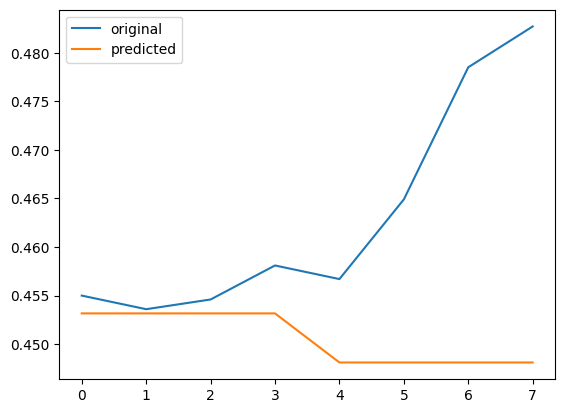

In [ ]:
# importing package
import matplotlib.pyplot as plt


# plot line
plt.plot(np.arange(0,len(Y_test)), Y_test,label = "original")
plt.plot(np.arange(0,len(Y_test)), y_pred,label = "predicted")
plt.legend()
plt.show()

In [ ]:
initial=[[df['USA'].iloc[-1],df['USA_1_years_ago'].iloc[-1],df['USA_2_years_ago'].iloc[-1]]]
simulations = []
for i in range(0,37):
  tmp = np.array(initial)
  predicted = xgb.predict(tmp)
  simulations.append(predicted[0])
  initial[0].insert(0,predicted[0])
  initial[0].pop()


In [ ]:
df['simulations'] = simulations
initial_USA=df['USA'].iloc[-1]
simulations_final_USA=initial_USA * (df['simulations']+1).cumprod()


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,37),
                         y=simulations_final_USA,
                         name='Simulations',
                         showlegend=False))

fig.show()

##Neural Networks

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
Y_test

array([0.455 , 0.4536, 0.4546, 0.4581, 0.4567, 0.4649, 0.4785, 0.4827])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100,  activation='relu', return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1,activation='linear'))


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            41600     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71851 (280.67 KB)
Trainable params: 71851 (280.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=5, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/10
5/5 - 5s - loss: 0.1611 - val_loss: 0.1822 - 5s/epoch - 1s/step
Epoch 2/10
5/5 - 0s - loss: 0.1493 - val_loss: 0.1698 - 61ms/epoch - 12ms/step
Epoch 3/10
5/5 - 0s - loss: 0.1380 - val_loss: 0.1567 - 77ms/epoch - 15ms/step
Epoch 4/10
5/5 - 0s - loss: 0.1261 - val_loss: 0.1427 - 84ms/epoch - 17ms/step
Epoch 5/10
5/5 - 0s - loss: 0.1134 - val_loss: 0.1275 - 85ms/epoch - 17ms/step
Epoch 6/10
5/5 - 0s - loss: 0.0997 - val_loss: 0.1109 - 61ms/epoch - 12ms/step
Epoch 7/10
5/5 - 0s - loss: 0.0848 - val_loss: 0.0930 - 89ms/epoch - 18ms/step
Epoch 8/10
5/5 - 0s - loss: 0.0690 - val_loss: 0.0740 - 79ms/epoch - 16ms/step
Epoch 9/10
5/5 - 0s - loss: 0.0525 - val_loss: 0.0545 - 61ms/epoch - 12ms/step
Epoch 10/10
5/5 - 0s - loss: 0.0363 - val_loss: 0.0356 - 61ms/epoch - 12ms/step


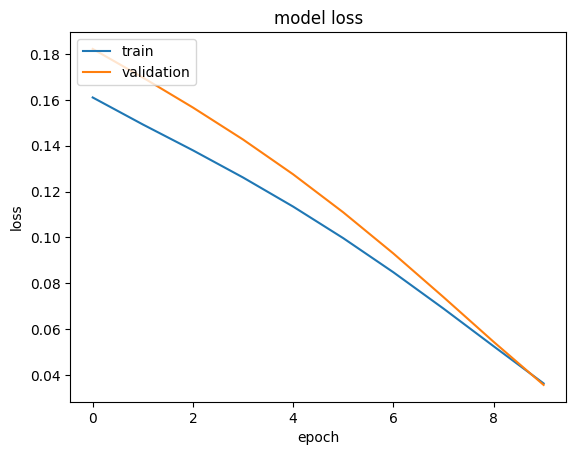

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 359ms/step


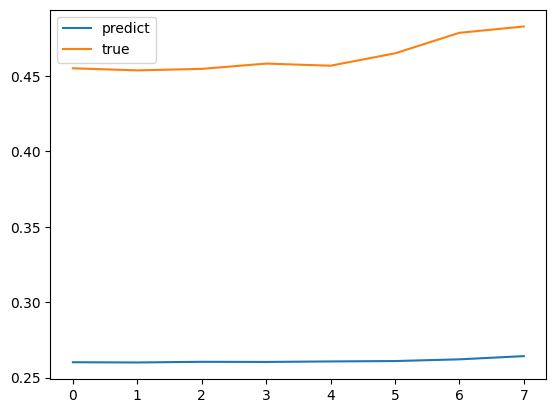

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_pred, label='predict')
plt.plot(Y_test, label='true')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(Y_test,y_pred))
print(mean_squared_error(Y_test,y_pred))


-354.6793653475157
0.04083949375350759


#Make simulations

In [ ]:
initial=[[df['USA'].iloc[-1],df['USA_1_years_ago'].iloc[-1],df['USA_2_years_ago'].iloc[-1]]]


In [ ]:
simulations = []
for i in range(0,37):
  tmp = np.array(initial)
  tmp = np.reshape(tmp, (tmp.shape[0], 1, tmp.shape[1]))
  predicted = model.predict(tmp)
  simulations.append(predicted[0][0])
  initial[0].insert(0,predicted[0][0])
  initial[0].pop()


1/1 [==============================] - 0s 24ms/step


In [ ]:
df['simulations'] = simulations

In [ ]:
df

,Percentile,Year,USA,North Macedonia,Italy,USA_1_years_ago,North Macedonia_1_years_ago,Italy_1_years_ago,USA_2_years_ago,North Macedonia_2_years_ago,...,USA_1_years_ago_3_years_ago,North Macedonia_1_years_ago_3_years_ago,Italy_1_years_ago_3_years_ago,USA_2_years_ago_3_years_ago,North Macedonia_2_years_ago_3_years_ago,Italy_2_years_ago_3_years_ago,USA_1_years_ago_2_years_ago_3_years_ago,North Macedonia_1_years_ago_2_years_ago_3_years_ago,Italy_1_years_ago_2_years_ago_3_years_ago,simulations
6,p90p100,1986,0.3634,0.2737,0.2936,0.3655,0.2782,0.2810,0.3649,0.2839,...,0.3460,0.2742,0.2616,0.3433,0.2742,0.2733,0.3384,0.2742,0.2839,0.266756
7,p90p100,1987,0.3747,0.2825,0.3007,0.3634,0.2737,0.2936,0.3655,0.2782,...,0.3536,0.2742,0.2704,0.3460,0.2742,0.2616,0.3433,0.2742,0.2733,0.244460
8,p90p100,1988,0.3924,0.2955,0.3108,0.3747,0.2825,0.3007,0.3634,0.2737,...,0.3649,0.2839,0.2756,0.3536,0.2742,0.2704,0.3460,0.2742,0.2616,0.224181
9,p90p100,1989,0.3878,0.2705,0.3145,0.3924,0.2955,0.3108,0.3747,0.2825,...,0.3655,0.2782,0.2810,0.3649,0.2839,0.2756,0.3536,0.2742,0.2704,0.200647
10,p90p100,1990,0.3876,0.2686,0.3152,0.3878,0.2705,0.3145,0.3924,0.2955,...,0.3634,0.2737,0.2936,0.3655,0.2782,0.2810,0.3649,0.2839,0.2756,0.194745
11,p90p100,1991,0.3832,0.2780,0.3145,0.3876,0.2686,0.3152,0.3878,0.2705,...,0.3747,0.2825,0.3007,0.3634,0.2737,0.2936,0.3655,0.2782,0.2810,0.190563
12,p90p100,1992,0.3941,0.2872,0.3173,0.3832,0.2780,0.3145,0.3876,0.2686,...,0.3924,0.2955,0.3108,0.3747,0.2825,0.3007,0.3634,0.2737,0.2936,0.187651
13,p90p100,1993,0.3910,0.2968,0.3233,0.3941,0.2872,0.3173,0.3832,0.2780,...,0.3878,0.2705,0.3145,0.3924,0.2955,0.3108,0.3747,0.2825,0.3007,0.186537
14,p90p100,1994,0.3913,0.3063,0.3275,0.3910,0.2968,0.3233,0.3941,0.2872,...,0.3876,0.2686,0.3152,0.3878,0.2705,0.3145,0.3924,0.2955,0.3108,0.185845
15,p90p100,1995,0.3990,0.3165,0.3353,0.3913,0.3063,0.3275,0.3910,0.2968,...,0.3832,0.2780,0.3145,0.3876,0.2686,0.3152,0.3878,0.2705,0.3145,0.185441


In [ ]:
initial_USA=df['USA'].iloc[-1]
simulations_final_USA=initial_USA * (simulations_USA+1).cumprod()


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,37),
                         y=simulations_final_USA,
                         name='Simulations',
                         showlegend=False))

fig.show()